In [2]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("weight-height.csv")

In [8]:
df.sample(5)

,Gender,Height,Weight
2386,Male,66.402397,165.955935
5483,Female,62.587116,153.574348
4400,Male,76.600183,239.697207
2011,Male,67.751776,188.475320
8756,Female,60.709592,113.172283


In [14]:
df.shape

(10000, 3)

In [18]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [20]:
import seaborn as sns

C:\Users\PREET\AppData\Local\Temp\ipykernel_1748\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

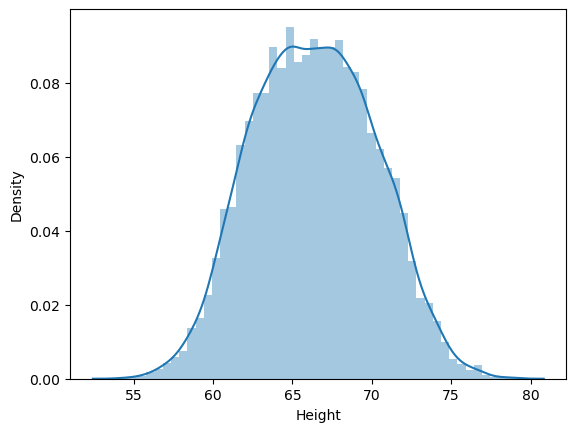

In [22]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

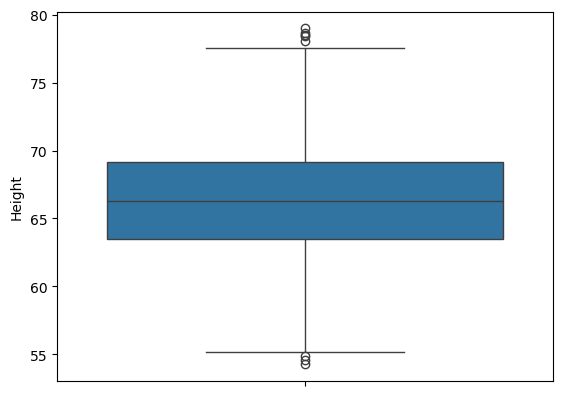

In [26]:
sns.boxplot(df['Height'])

In [32]:
upper_limit = df['Height'].quantile(0.99)

upper_limit

74.7857900583366

In [34]:
lower_limit = df['Height'].quantile(0.01)

lower_limit

58.13441158671655

In [42]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [44]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

C:\Users\PREET\AppData\Local\Temp\ipykernel_1748\1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

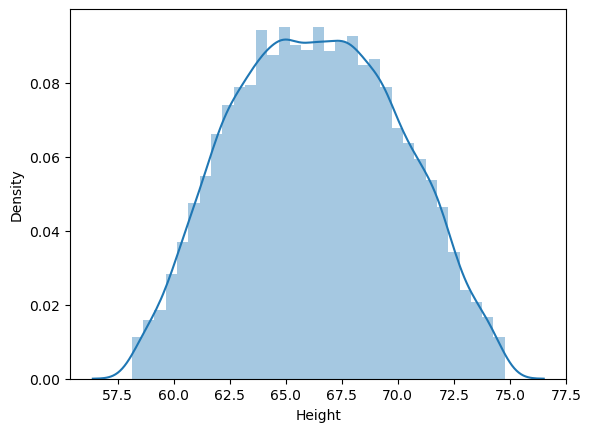

In [46]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

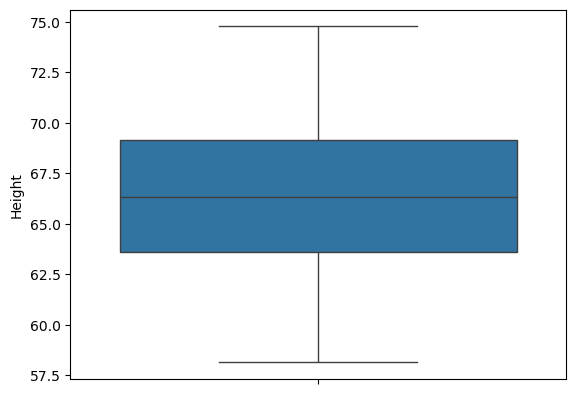

In [48]:
sns.boxplot(new_df['Height'])

In [54]:
# capping (Winsorization)

df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
         np.where(df['Height'] <= lower_limit,
         lower_limit,
         df['Height']
        ))

In [58]:
df.shape

(10000, 3)

In [60]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64